
# Financial Sales Analysis Project

## Objective
Analyze sales performance, revenue, cost, and profitability using the provided transactional dataset.

## Dataset Description
The dataset contains customer demographics, product details, geography, and financial metrics such as:
- Revenue
- Cost
- Profit


In [11]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Dataset Upload

In [29]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving Bike Sales in Europe.csv to Bike Sales in Europe (2).csv


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418



## Data Cleaning & Understanding


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [5]:

df.isna().sum()


,0
Date,0
Day,0
Month,0
Year,0
Customer_Age,0
Age_Group,0
Customer_Gender,0
Country,0
State,0
Product_Category,0


In [13]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


/tmp/ipython-input-2866958243.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


Basic financial KPIs

In [27]:
total_revenue = df['Revenue'].sum()
total_cost = df['Cost'].sum()
total_profit = df['Profit'].sum()

total_revenue, total_cost, total_profit


(np.int64(85271008), np.int64(53049908), np.int64(32221100))

Profit margin

In [15]:
profit_margin = (total_profit / total_revenue) * 100
profit_margin

np.float64(37.78670002352968)

Revenue by year

In [17]:
revenue_by_year = df.groupby('Year')['Revenue'].sum()
revenue_by_year

,Revenue
Year,
2011,8964888
2012,9175983
2013,15240037
2014,14152724
2015,20023991
2016,17713385


Revenue by year chart

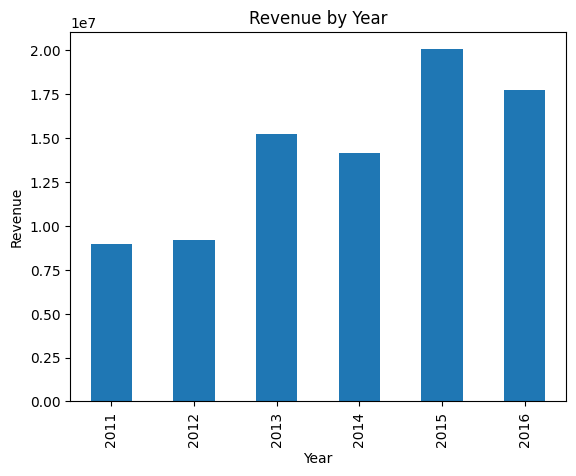

In [18]:
revenue_by_year.plot(kind='bar')
plt.title("Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

Profit by product category

In [16]:
profit_by_category = df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)
profit_by_category


,Profit
Product_Category,
Bikes,20519276
Accessories,8862377
Clothing,2839447


Profit by product category chart

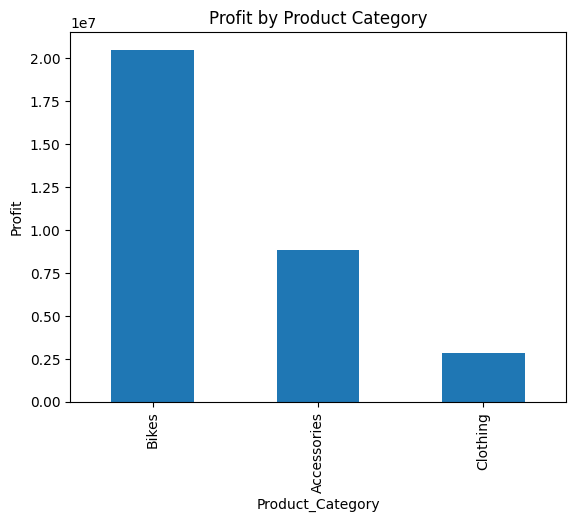

In [26]:
profit_by_category.plot(kind='bar')
plt.title("Profit by Product Category")
plt.ylabel("Profit")
plt.show()


Revenue by country

In [25]:
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
revenue_by_country


,Revenue
Country,
United States,27975547
Australia,21302059
United Kingdom,10646196
Germany,8978596
France,8432872
Canada,7935738


Revenue by country chart

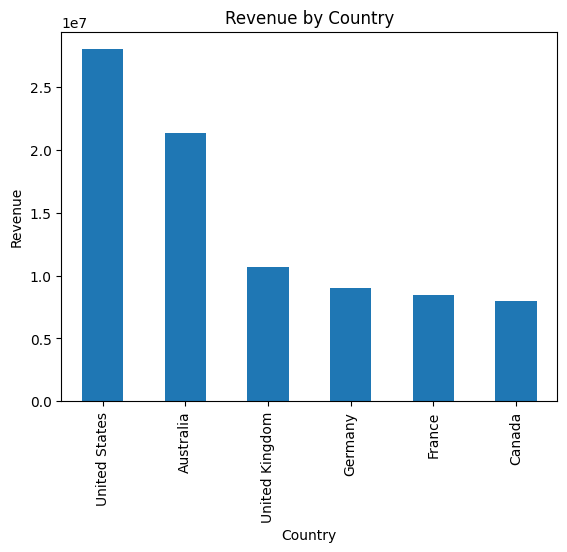

In [24]:
revenue_by_country.plot(kind='bar')
plt.title("Revenue by Country")
plt.ylabel("Revenue")
plt.show()


Gender-based profit analysis

In [19]:
profit_by_gender = df.groupby('Customer_Gender')['Profit'].sum()
profit_by_gender

,Profit
Customer_Gender,
F,15733868
M,16487232


Age group analysis

In [20]:
profit_by_age_group = df.groupby('Age_Group')['Profit'].sum().sort_values(ascending=False)
profit_by_age_group

,Profit
Age_Group,
Adults (35-64),16321582
Young Adults (25-34),11386761
Youth (<25),4374592
Seniors (64+),138165


Top 5 products by profit

In [21]:
top_products = df.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(5)
top_products

,Profit
Product,
"Mountain-200 Black, 38",1310464
"Road-150 Red, 62",1243755
"Mountain-200 Silver, 42",1231452
"Sport-100 Helmet, Red",1191402
"Mountain-200 Silver, 38",1165560


Cost vs Revenue comparison

In [22]:
cost_vs_revenue = df[['Revenue', 'Cost']].sum()
cost_vs_revenue

,0
Revenue,85271008
Cost,53049908


Cost vs Revenue chart

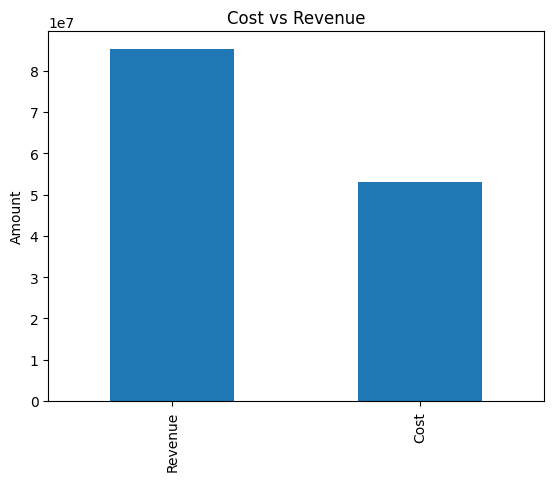

In [23]:
cost_vs_revenue.plot(kind='bar')
plt.title("Cost vs Revenue")
plt.ylabel("Amount")
plt.show()

## Executive Summary

- The business generated strong total revenue with a positive profit margin.
- Certain product categories contribute disproportionately to profit.
- Revenue concentration exists in specific countries.
- Adult customers (35–64) form the most profitable age group.
- Cost control remains critical to maintain margins.

This analysis provides actionable insights for pricing, product focus, and geographic expansion.
